In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# import data

In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/amongnikol/belajaraDataScienceJCOp/refs/heads/main/course2-regresiDanKlasifikasiPemula-supervisedLearning/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30492 entries, 0 to 30491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30492 non-null  float64
 1   V1      30492 non-null  float64
 2   V2      30492 non-null  float64
 3   V3      30492 non-null  float64
 4   V4      30492 non-null  float64
 5   V5      30492 non-null  float64
 6   V6      30492 non-null  float64
 7   V7      30492 non-null  float64
 8   V8      30492 non-null  float64
 9   V9      30492 non-null  float64
 10  V10     30492 non-null  float64
 11  V11     30492 non-null  float64
 12  V12     30492 non-null  float64
 13  V13     30492 non-null  float64
 14  V14     30492 non-null  float64
 15  V15     30492 non-null  float64
 16  V16     30492 non-null  float64
 17  V17     30492 non-null  float64
 18  V18     30492 non-null  float64
 19  V19     30492 non-null  float64
 20  V20     30492 non-null  float64
 21  V21     30492 non-null  float64
 22

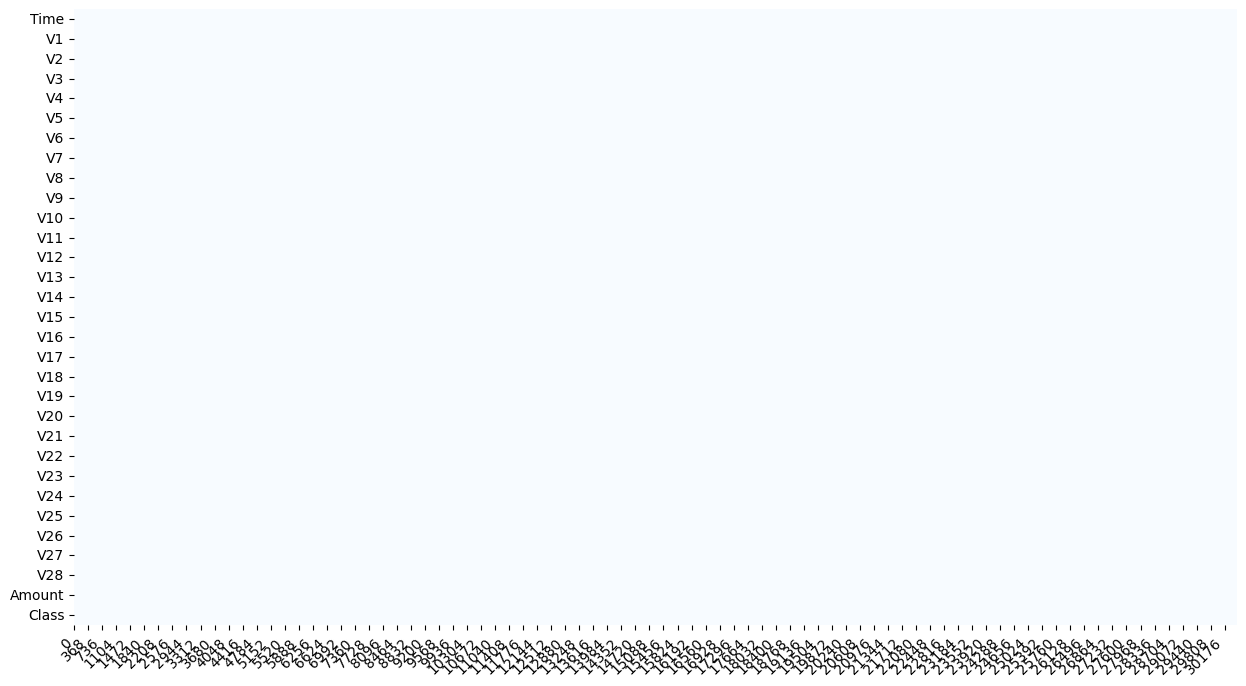

In [6]:
plot_missing_value(df)

# dataset splitting

In [7]:
# class curang atau tidak curang
x = df.drop(columns='Class')
y = df.Class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

# training

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

# year disini masuk kedalam numerik agar model dapat membaca ketika terdapat tahun baru
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), x_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

# cv = cross validation
model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.9990161111794367 0.9988111343418193 0.9972126578127561


jika mendapatkan score akurasi setinggi itu kita harus curiga dan cek kembali
- apakah terjadi data leakage
- apakah datasetnya imbalance
- apakah memang problemnya sesuatu yang sederhana

pada kasus ini dataset kita sebenarnya imbalance

In [9]:
# nilai target imbalance
df.Class.value_counts()

0    30000
1      492
Name: Class, dtype: int64

In [11]:
30000/30492

0.9838646202282566

# akurasi tidak bisa dipakai untuk imbalance dataset

by default, kita tidak boleh pakai akurasi sebagai metrik ketika datanya imbalance. pakailah F1-score. penjelasan mengenai matrik akan kita bahas lebih lanjut dimateri selanjutnya. untuk sekarang, gunakanlah scoring='f1'

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

# year disini masuk kedalam numerik agar model dapat membaca ketika terdapat tahun baru
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), x_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

# cv = cross validation
model = GridSearchCV(pipeline, gsp.svm_params, cv=4, scoring='f1', n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 4 folds for each of 49 candidates, totalling 196 fits


c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.01}
0.9859154929577465 0.9648327563070539 0.9518716577540107


# cek hasil model aktual menggunakan confusion matrix

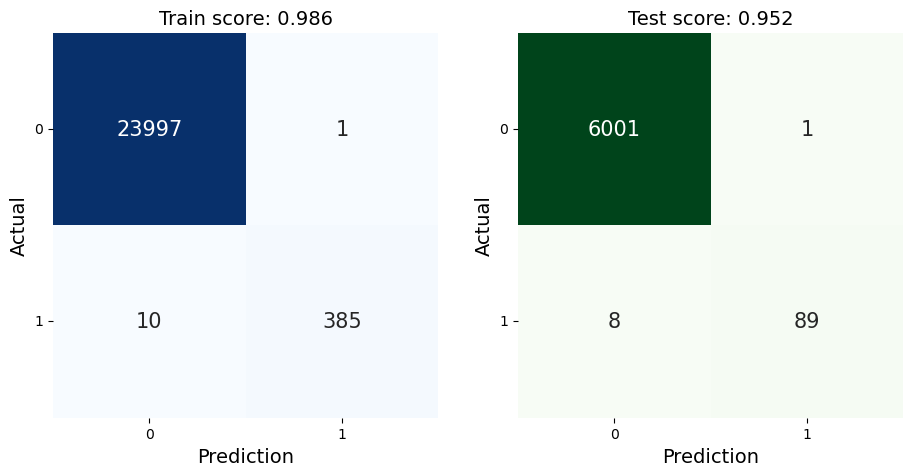

In [22]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(x_train,y_train,x_test,y_test, model)

# coba improve pakai class weight 

In [ ]:
[
{0: 0.05, 1:0.95},
{0: 0.1, 1:0.9},
{0: 0.25, 1:0.75}
]

In [18]:
[{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]]

[{0: 0.05, 1: 0.95}, {0: 0.1, 1: 0.9}, {0: 0.25, 1: 0.75}]

In [17]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

# year disini masuk kedalam numerik agar model dapat membaca ketika terdapat tahun baru
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), x_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'algo__gamma': np.logspace(-3, 3, 7),
    'algo__C': np.logspace(-3, 3, 7),
    'algo__class_weight': [{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]]
 }

# cv = cross validation
model = GridSearchCV(pipeline, parameter, cv=5, scoring='f1', n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 5 folds for each of 147 candidates, totalling 735 fits


c:\Users\akmal\anaconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 1000.0, 'algo__class_weight': {0: 0.25, 1: 0.75}, 'algo__gamma': 0.001}
0.9910828025477708 0.9630443517582004 0.9462365591397849


ternyata menggunakan class weight tidak improve